In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('G:/Stuff/Handle-Imbalanced-Dataset-master/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

### Checking Missing values

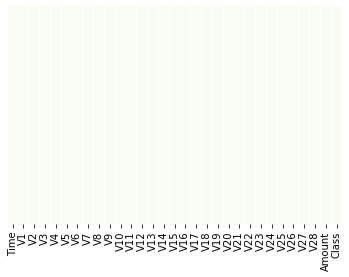

In [5]:
sns.heatmap(df.isnull(),cbar=False,cmap='Greens',yticklabels=False)

### Handling Imbalance dataset

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
normal =df[df['Class']==0]
fraud =df[df['Class']==1]

In [8]:
print('Normal values :{}\nFraud values :{}'.format(normal.shape,fraud.shape))

Normal values :(284315, 31)
Fraud values :(492, 31)


In [9]:
data=df.drop('Class',axis=1)
target=df['Class']

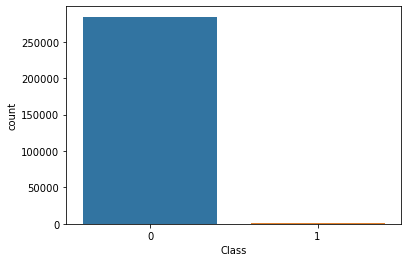

In [10]:
sns.countplot(target)

In [11]:
from imblearn.over_sampling import RandomOverSampler

In [12]:
ros = RandomOverSampler(sampling_strategy=1.0,random_state=42)
X,Y=ros.fit_sample(data,target)

In [13]:
X.shape,Y.shape

((568630, 30), (568630,))

In [14]:
Y.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

### Feature Selection

In [15]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


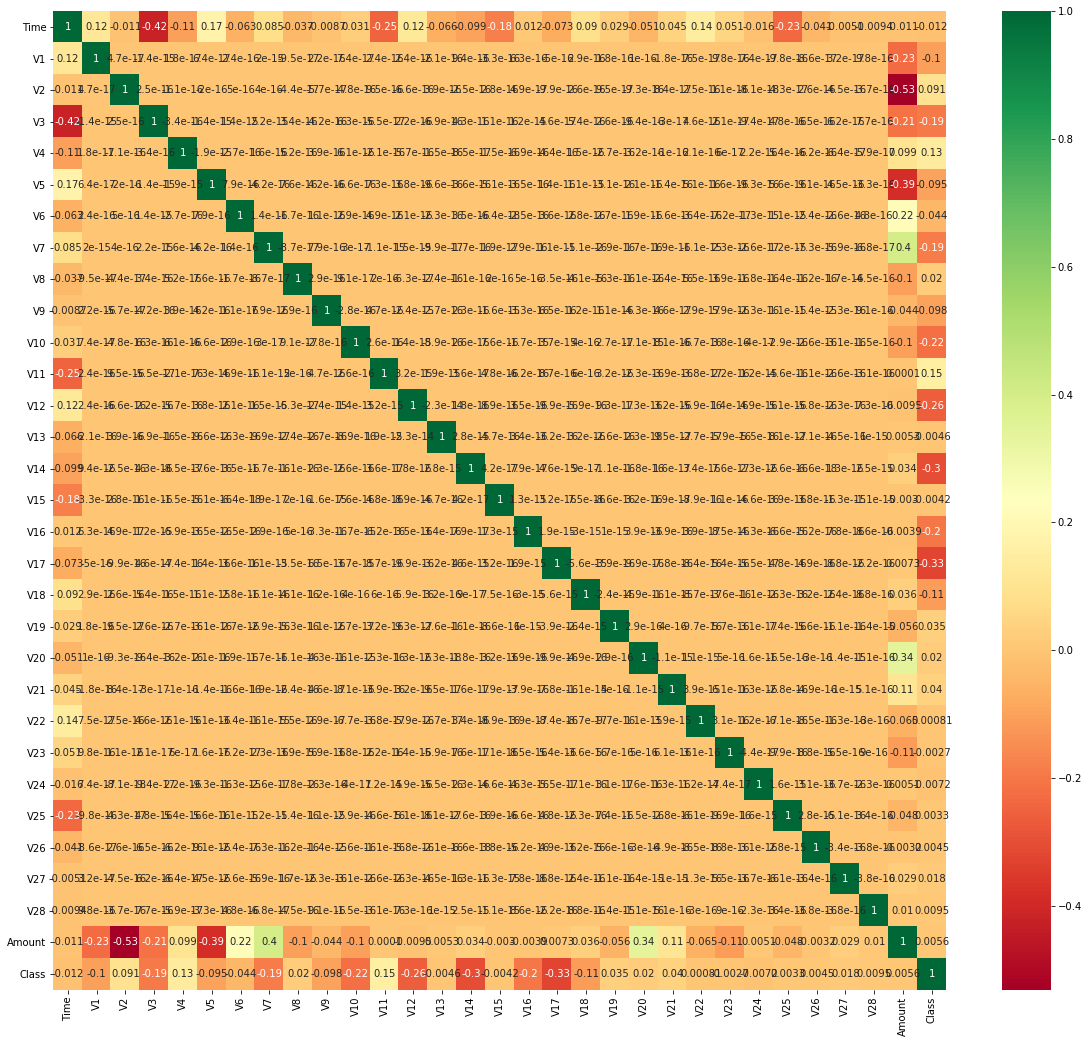

In [16]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler =MinMaxScaler()
sdata=scaler.fit_transform(X)
sdata

array([[0.00000000e+00, 9.35192337e-01, 7.66490419e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [0.00000000e+00, 9.78541955e-01, 7.70066651e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [5.78730497e-06, 9.35217023e-01, 7.53117667e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [2.00744247e-01, 9.43669394e-01, 8.00303376e-01, ...,
        4.41858929e-01, 3.27150339e-01, 7.40332472e-04],
       [2.33089495e-01, 9.77990093e-01, 7.97275155e-01, ...,
        4.16695141e-01, 3.16386365e-01, 3.89238944e-05],
       [5.93441826e-01, 9.33543252e-01, 8.06724118e-01, ...,
        4.22383318e-01, 3.06557967e-01, 8.87464793e-05]])

In [28]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [30]:
data1=pd.DataFrame(sdata,columns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724


In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
bestFeatures =SelectKBest(score_func=chi2,k=10)
fit =bestFeatures.fit(data1,Y)

In [32]:
dfScores =pd.DataFrame(fit.scores_)
dfFeatures =pd.DataFrame(data1.columns)

In [33]:
featureScores = pd.concat([dfFeatures,dfScores],axis=1,)
featureScores.columns =['features','score']
featureScores

,features,score
0,Time,1883.676024
1,V1,1023.841023
2,V2,266.499550
3,V3,2731.494208
4,V4,16386.425327
5,V5,85.415063
6,V6,109.363275
7,V7,662.037403
8,V8,6.738382
9,V9,2693.600459


In [34]:
featureScores.nlargest(10,'score')

,features,score
11,V11,18277.304350
4,V4,16386.425327
14,V14,14813.385264
12,V12,13502.351137
17,V17,8427.976218
16,V16,6435.026838
18,V18,5905.419159
10,V10,4366.447024
3,V3,2731.494208
9,V9,2693.600459


In [36]:
featureScores.nlargest(10,'score')['features'].values

array(['V11', 'V4', 'V14', 'V12', 'V17', 'V16', 'V18', 'V10', 'V3', 'V9'],
      dtype=object)

In [39]:
df1=data1.loc[:,['V11', 'V4', 'V14', 'V12', 'V17', 'V16', 'V18', 'V10', 'V3', 'V9']]

In [42]:
df1.head()

,V11,V4,V14,V12,V17,V16,V18,V10,V3,V9
0,0.252484,0.313023,0.635591,0.680908,0.737173,0.434392,0.655066,0.510600,0.881365,0.475312
1,0.381188,0.271796,0.641219,0.744342,0.727794,0.464105,0.640681,0.505267,0.840298,0.453981
2,0.322422,0.268766,0.640473,0.706683,0.763381,0.357443,0.644945,0.513018,0.868141,0.410603
3,0.271817,0.213661,0.636372,0.710910,0.711253,0.415653,0.788492,0.507585,0.868484,0.414999
4,0.236355,0.269796,0.608406,0.724477,0.724243,0.434995,0.650665,0.524303,0.864251,0.490950


In [44]:
X.shape,data1.shape,df1.shape

((568630, 30), (568630, 30), (568630, 10))

In [43]:
### balanced:X, scaled:data1, best_features:df1

### Model Creation.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [140]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [141]:
x_test.shape

(170589, 30)

In [49]:
RF=RandomForestClassifier(max_depth=5)
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [51]:
LR=LogisticRegression(C=1)
LR.fit(x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
XGB=XGBClassifier()
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

### Checking Accuracy for Test data

In [143]:
y_predict=XGB.predict(x_test)

In [60]:
RF.score(x_test,y_test)*100

95.63336440215959

In [57]:
from sklearn.metrics import accuracy_score

In [144]:
accuracy_score(y_predict,y_test)*100

99.99355175304386

In [145]:
XGB.score(x_test,y_test)*100

99.99355175304386

In [64]:
LR.score(x_test,y_test)*100

93.67016630615103

In [65]:
KNN.score(x_test,y_test)*100

99.93434512190117

### Checking Accuracy for Train data

In [66]:
RF.score(x_train,y_train)*100

95.67732972231504

In [146]:
XGB.score(x_train,y_train)*100

100.0

In [68]:
LR.score(x_train,y_train)*100

93.77702296999556

In [69]:
KNN.score(x_train,y_train)*100

99.96683758708274

In [86]:
a=X.loc[200000,:]

In [94]:
a1=pd.DataFrame(a)
a1=a1.transpose()

In [95]:
XGB.predict(a1)

array([0], dtype=int64)

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [147]:
confusion_matrix(y_predict,y_test)

array([[85161,     0],
       [   11, 85417]], dtype=int64)

In [148]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85161
           1       1.00      1.00      1.00     85428

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [150]:
from sklearn.externals import joblib

In [151]:
joblib.dump(XGB,'G:\Stuff\credit_card_xgb.pkl')

['G:\\Stuff\\credit_card_xgb.pkl']

In [152]:
xgb_joblib =joblib.load('G:\Stuff\credit_card_xgb.pkl')

In [155]:
xgb_joblib.predict(x_test)

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)